In [1]:
import os
from lib.train_AI_lib import *

In [2]:
os.chdir('..')  # Setting current directory to root of repo
print(os.getcwd())

c:\Users\kevin\Documents\GitHub\APS360-2020Summer-Project


Converting Training Images
Converting Validation Images
Converting Testing Images
Converting Complete
Epoch 0 | Time Taken: 24.52s | Train rootMSE: 45.6253323225, Train loss: 2081.6709495367 | Validation rootMSE: 38.6188172430, Validation loss: 1491.4130452474
Epoch 1 | Time Taken: 1.55s | Train rootMSE: 25.1093928633, Train loss: 630.4816099655 | Validation rootMSE: 22.5295331621, Validation loss: 507.5798645020
Epoch 2 | Time Taken: 1.55s | Train rootMSE: 21.6166609849, Train loss: 467.2800321357 | Validation rootMSE: 22.6225719519, Validation loss: 511.7807617188
Epoch 3 | Time Taken: 1.50s | Train rootMSE: 21.1427957716, Train loss: 447.0178130394 | Validation rootMSE: 21.6304081676, Validation loss: 467.8745574951
Epoch 4 | Time Taken: 1.50s | Train rootMSE: 20.2794143000, Train loss: 411.2546443496 | Validation rootMSE: 20.1922168555, Validation loss: 407.7256215413
Epoch 5 | Time Taken: 1.49s | Train rootMSE: 19.3146393596, Train loss: 373.0552935933 | Validation rootMSE: 19.808

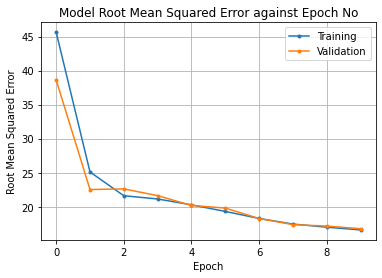

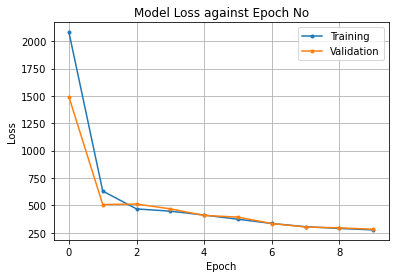

In [3]:
class exNetClass(nn.Module):
    def __init__(self, name):
        super(exNetClass, self).__init__()
        self.name = name

        self.conv1 = nn.Conv2d(3,   4,  4, stride=2)  # n = 1024 -> 510
        self.conv2 = nn.Conv2d(4,  5,  4, stride=2)  # n = 510  -> 255
        self.pool1 = nn.MaxPool2d(3, 2)                # n = 255  -> 127
        self.conv3 = nn.Conv2d(5,  5,  4, stride=2)  # n = 127  -> 62
        self.pool2 = nn.MaxPool2d(4, 2)                # n = 62   -> 30

        self.fc1   = nn.Linear(1*1*5, 10)
        self.fc2   = nn.Linear(10, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        #print(x.size())
        x = F.relu(self.conv2(x))
        #print(x.size())
        x = self.pool2(F.relu(self.conv3(x)))
        #print(x.size())
        x = x.view(-1, 1*1*5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return(x)

batchsize=64; lr=0.001; epochNo=10
trainLoader, valLoader, _ = loadData(batchsize, inPath="saved/0.1_resolution", tempPath='temp/default', mode='default')
net = exNetClass("netA"); net.cuda()
netATrain = trainNet(net, [trainLoader, valLoader], batchsize, epochNo, lr, isCuda=1)